# SI 618 - Lab 2 Answers: Pandas I: DataFrames, Data Manipulation

## Objectives:
* Know how to manipulate Series and DataFrame
* Draw a random sample of data
* Handle missing values by filtering out or filling in blanks with values
* Select subset of data using boolean masking
* Compute descriptive and summary statistics
* Discretize continuous variables
* Sort Series/DataFrame by index or column
* Group data and calculate aggregate statistics
* Use vectorized string methods
* Make basic plots (scatter plot, histogram, bar chart, etc)

## Submission Instructions:
Please turn in this Jupyter notebook file (both .ipynb and .html formats) on Canvas before you leave the classroom. Try to get through as much as you can.

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [ ]:
MY_UNIQNAME = 'huangmy'

## Preface
This lab consists of Part 0, Part 1 and Part 2. Part 0 is an introduction to some Pandas basics. There are no points assocaited with Part 0 but we will be covering it in class. Part 1 is based on a survey dataset and Part 2 uses movies and cast data. We will guide you through Part 1, and let you work on Part 2 on your own. 

**Questions 1-12 are worth 1 point each.  Questions 13-22 are worth 2 points each.**

## Part 0: Background

## Pandas
* high-level library to support data manipulation and analysis
* DataFrame is the primary object we’ll be dealing with
* similar to R’s dataframe
* maps onto tabular structure
* good for time series and econometric data

## Shift from "pythonic" to "pandorable"

* less looping over elements
* lots of built-in functionality
* a "paradigm shift"

# Data structures

We're all familiar with lists:

In [2]:
names = ["Charlotte", "Ingrid", "Ian", "Eric"]
scores = [80, 95, 85, 70]

Now let's say that we wanted to divide each of those scores by two and assign the results to another variable. Go ahead and write some code that does that... There are lots of ways to do this, so go ahead and write one way to do it (without importing any additional python packages) and assign the results to a 
variable called ```half```:

In [3]:
# insert your code here
# create a new blank list and append new values each time
half = []
for score in scores:
    halfscore = score / 2
    half.append(halfscore)

In [4]:
half

[40.0, 47.5, 42.5, 35.0]

If you followed the above instructions, the following cell block should print
a list of floats that looks like ```
[40.0, 47.5, 42.5, 35.0]```


In [5]:
half

[40.0, 47.5, 42.5, 35.0]

We can put data into an array structure that allows us to apply more powerful
functions.  The data structure that we're interested in is called an ```ndarray``` and is from the ```numpy``` package:

In [6]:
import numpy as np
ascores = np.array(scores)

In [7]:
ascores 

array([80, 95, 85, 70])

In [8]:
ahalf = ascores / 2

In [9]:
ahalf

array([40. , 47.5, 42.5, 35. ])

Numpy arrays are powerful, but they have some limitations:  they can only 
consist of one type of data (e.g. int), etc.  pandas provides two additional
data structures that are built on numpy ndarrays.

The first are Series.  Let's create a simple pandas Series and examine it:

In [10]:
import pandas as pd

In [11]:
from pandas import Series

In [12]:
sscores = Series(scores,name='scores')

In [13]:
sscores

0    80
1    95
2    85
3    70
Name: scores, dtype: int64

So you see a couple of useful things: an index (0 to 3) and a data type (dtype), which in this case is an int64.

**A Series is a one-dimensional ndarray with axis labels**

In [9]:
data = dict(zip(names,scores))

In [20]:
# show the zip
for item in zip(names, scores):
    print(names)
    print(scores)
print(zip(names, scores))

['Charlotte', 'Ingrid', 'Ian', 'Eric']
[80, 95, 85, 70]
['Charlotte', 'Ingrid', 'Ian', 'Eric']
[80, 95, 85, 70]
['Charlotte', 'Ingrid', 'Ian', 'Eric']
[80, 95, 85, 70]
['Charlotte', 'Ingrid', 'Ian', 'Eric']
[80, 95, 85, 70]


In [13]:
import pandas as pd
from pandas import Series

In [11]:
data

{'Charlotte': 80, 'Ingrid': 95, 'Ian': 85, 'Eric': 70}

In [14]:
sData = Series(data=data,name='score')

In [15]:
sData

Charlotte    80
Ingrid       95
Ian          85
Eric         70
Name: score, dtype: int64

So Series are a bit friendlier than numpy arrays, but they're still only one-dimensional.  Keep in mind that our basic data abstraction is a table, which can
be thought of as a two-dimensional array.  Let's go ahead and create a simple DataFrame with just one column:

In [16]:
# promote a series to data frame
sData.to_frame()

,score
Charlotte,80
Ingrid,95
Ian,85
Eric,70


Let's return to the code we ran last time and walk though it just to make sure we understand it

In [21]:
# year range
years = range(1880, 2015)
pieces = []
for year in years:
    path = 'data/names/yob%d.csv'%year
    # for each year a certain csv file frame would be added
    frame = pd.read_csv(path)
    frame['year'] = year
    pieces.append(frame)
df_names = pd.concat(pieces, ignore_index=True)

In [22]:
print(df_names)

                name gender  birth_count  year
0             Simeon      M           23  1880
1              Raoul      M            7  1880
2                Lou      M           14  1880
3               Myra      F           83  1880
4              Alois      M           10  1880
5              Hosea      M           10  1880
6             Arthur      M         1599  1880
7               Vena      F           11  1880
8             Electa      F            6  1880
9             Tessie      F           17  1880
10           William      F           30  1880
11              Inez      F          106  1880
12              Alla      F            6  1880
13         Sylvester      M           89  1880
14             Norma      F           32  1880
15             Elise      F           24  1880
16            Caesar      M            6  1880
17            Julian      M           32  1880
18              Arch      M           61  1880
19            Joseph      F           10  1880
20           

# Part 1 (as a group): Mental Health Disorders In the Tech Workplace

## Data Description

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

## Metadata

**Timestamp**

**Age**

**Gender**

**Country**

**state**: If you live in the United States, which state or territory do you live in?

**self_employed**: Are you self-employed?

**family_history**: Do you have a family history of mental illness?

**treatment**: Have you sought treatment for a mental health condition?

**work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?

**no_employees**: How many employees does your company or organization have?

**remote_work**: Do you work remotely (outside of an office) at least 50% of the time?

**tech_company**: Is your employer primarily a tech company/organization?

**benefits**: Does your employer provide mental health benefits?

**care_options**: Do you know the options for mental health care your employer provides?

**wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?

**seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?

**anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

**leave**: How easy is it for you to take medical leave for a mental health condition?

**mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?

**phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?

**coworkers**: Would you be willing to discuss a mental health issue with your coworkers?

**supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

**mental_health_interview**: Would you bring up a mental health issue with a potential employer in an interview?

**phys_health_interview**: Would you bring up a physical health issue with a potential employer in an interview?

**mental_vs_physical**: Do you feel that your employer takes mental health as seriously as physical health?

**obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

**comments**: Any additional notes or comments



First, read the data file into a DataFrame

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
# either change the path name or put the file into the data folder
df = pd.read_csv("data/survey.csv")

It's common to look at the resulting DataFrame using .head()

In [15]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


If you want to look at a random sample, you can use .sample()

In [16]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
470,2014-08-27 16:13:31,31,Male,United States,OR,No,No,Yes,Sometimes,100-500,...,Very easy,No,No,Some of them,Yes,No,No,Yes,No,NaN
216,2014-08-27 13:08:17,30,Male,Germany,NaN,Yes,No,Yes,Often,6-25,...,Very difficult,No,No,Some of them,Yes,Maybe,Yes,Yes,No,I tried to answer as good as possible but I am...
236,2014-08-27 13:27:18,37,Male,Canada,NaN,No,Yes,Yes,Often,26-100,...,Don't know,Maybe,No,Some of them,Some of them,No,Yes,Don't know,No,NaN
1105,2014-08-30 00:09:55,25,Male,United States,SC,No,No,Yes,Rarely,6-25,...,Somewhat easy,Maybe,No,No,Some of them,No,Maybe,Don't know,No,NaN
1021,2014-08-29 10:06:29,30,Female,United States,GA,No,Yes,Yes,Sometimes,500-1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,No,Yes,NaN


Finally, you can get some basic information about the size and shape of the DataFrame:

In [17]:
print("The number of rows of the dataset is: ", len(df))
# print the number of columns
print("The number of columns of the dataset is: ", len(df.columns))
print("The shape of the dataset is: ", df.shape)

The number of rows of the dataset is:  1259
The number of columns of the dataset is:  27
The shape of the dataset is:  (1259, 27)


You can list the columns:


In [18]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

And you can extract one or more columns.  The following pair of 
commands do exactly the same thing:

In [19]:
# list out all the country options
df['Country']
# notice that only the last statement's output is shown

0        United States
1        United States
2               Canada
3       United Kingdom
4        United States
5        United States
6        United States
7               Canada
8        United States
9               Canada
10       United States
11            Bulgaria
12       United States
13       United States
14              Canada
15       United States
16      United Kingdom
17       United States
18       United States
19              France
20       United States
21       United States
22       United States
23       United States
24       United States
25       United States
26       United States
27       United States
28       United States
29      United Kingdom
             ...      
1229            Greece
1230    United Kingdom
1231    United Kingdom
1232    United Kingdom
1233    United Kingdom
1234    United Kingdom
1235            Canada
1236     United States
1237           Ireland
1238     United States
1239       Netherlands
1240           Germany
1241       

# ONLY THE LAST ITEM SHOWS

In [20]:
# list out the first five items in country
# dot notation
df.Country.head()

0     United States
1     United States
2            Canada
3    United Kingdom
4     United States
Name: Country, dtype: object

In [21]:
df['Country'].head()

0     United States
1     United States
2            Canada
3    United Kingdom
4     United States
Name: Country, dtype: object

In [22]:
# combine the country and state together
country_state = df[['Country','state']]
country_state.head()

,Country,state
0,United States,IL
1,United States,IN
2,Canada,NaN
3,United Kingdom,NaN
4,United States,TX


## Extracting rows

In [34]:
# extract the 1st line
df.iloc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [ ]:
df.loc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [35]:
# set the Gender as the index 
df_gender = df.set_index('Gender')

In [36]:
df_gender.loc['Male'].head()

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Gender,,,,,,,,,,,,,,,,,,,,,
Male,2014-08-27 11:29:44,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
Male,2014-08-27 11:29:46,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
Male,2014-08-27 11:30:22,31,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
Male,2014-08-27 11:31:22,33,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
Male,2014-08-27 11:32:43,23,Canada,NaN,NaN,No,No,Never,26-100,No,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [ ]:
df.iloc['Gender'] # generates error

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [Gender] of <class 'str'>

In [ ]:
df.iloc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

## Sorting
You can use either sort_values() or sort_index():


In [37]:
# sort values according to the Ages
df_sorted = df.sort_values('Age')
df_sorted.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,


## Filtering using Boolean Masking

Example: Find people with family history of mental health condition. </font>

Solution:

In [38]:
# filter according to the boolean values
family_history_mask = df.family_history=='Yes'
# print the last five numbers
df[family_history_mask].tail(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [40]:
# simle filteration
df[df['Age']>10].tail(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1249,2015-07-22 18:57:54,30,M,United States,CA,No,Yes,Yes,Sometimes,26-100,...,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Bipolar disorder
1250,2015-07-27 23:25:34,30,Male,United States,CA,Yes,Yes,Yes,Often,26-100,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
1251,2015-08-17 09:38:35,36,Male,South Africa,NaN,No,Yes,Yes,Often,100-500,...,Somewhat easy,No,No,Some of them,Yes,No,Yes,Yes,No,NaN
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [43]:
# boolean masking
# df['Age'] > 40 would return the Boolean vector result

In [44]:
# double conditions
df_filtered = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes')]
df_filtered.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
15,2014-08-27 11:34:00,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...


### <font color="red">Q1: How many people are willing to discuss a mental health issue with their supervisor or their coworkers? </font>

In [47]:
# put your code here
df_filtered_talk = df[(df['supervisor'] == 'Yes') | (df['coworkers'] == 'Yes')]
len(df_filtered_talk)

546

### <font color="red">Q2: Make a new DataFrame ```df_millenials``` with only millennials (born between 1976 and 1996).  </font>

In [48]:
# put your code here
df_millenials = df[(df['Age']<=2014-1976) & (df['Age']>=2014-1996)]
df_millenials.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN


We will still use df for the following analysis 

## Descriptive and Summary Statistics

Example: What is the mean age of the survey sample?

Solution:

In [50]:
df['Age'].mean()

79428148.31135821

### <font color="red">Q3: What is the _median_ age of the survey sample?  </font>

In [51]:
# put your code here
df['Age'].median()

31.0

### <font color="red">Q4: Write one line of code to compute the statistics (mean, standard deviation, min, 25% percentile, etc) of the Age?  </font>

Hint: see the readings

In [52]:
# put your code here
df['Age'].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

## Unique Values, Counts, Membership

Example: Write one line of code to check unique values of Gender</font>

Solution:

In [53]:
# find all distinct values in Gender columns
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [54]:
df['coworkers'].unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

Example: Write one line of code to count the occurrences of the countries and show the top 10 countries.  </font>

Solution:

In [ ]:
# give categorical values frequency of first ten items
# sort from the most common to least common
df.Country.value_counts().head(10)

United States     751
United Kingdom    185
Canada             72
Germany            45
Ireland            27
Netherlands        27
Australia          21
France             13
India              10
New Zealand         8
Name: Country, dtype: int64

Example: Is there any employee from Norway? </font>

Solution:

In [ ]:
df.Country.isin(['Norway']).any()

True

### <font color="red">Q5: Find the unique categories of no_employees. What is the frequency of each category? </font>

In [55]:
# put your code here
print(df.no_employees.unique())
print(df.no_employees.value_counts())

['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64


### <font color="red">Q6: How many Michiganders aged between 20 and 30 sought treatment for a mental health condition? How many did not? </font>
Show your code and also include a markdown block with a complete sentence or two that answers these questions.

In [56]:
# put your code here
df[(df['Age']>=20) & (df['Age']<=30) & (df['state']=='MI')]['treatment'].value_counts()

Yes    5
No     3
Name: treatment, dtype: int64

Replace this with you answer

### <font color="red">Q7: Among the people from United States, how many repondents were there from each state?  </font>

In [59]:
# put your code here
df[df['Country']=='United States']['state'].value_counts()

CA    138
WA     70
NY     56
TN     45
TX     44
OH     30
OR     29
PA     29
IL     28
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
MO     12
GA     12
WI     12
UT     10
CO      9
AL      8
AZ      7
MD      7
NJ      6
OK      6
SC      5
KY      5
DC      4
IA      4
CT      4
SD      3
KS      3
NV      3
NH      3
VT      3
NE      2
NM      2
WY      2
MS      1
RI      1
WV      1
LA      1
ME      1
ID      1
Name: state, dtype: int64

## Basic Plots

Example: Investigate the proportion (%) of people receiving health benefits from their employers.

Solution:

AxesSubplot(0.125,0.125;0.775x0.755)


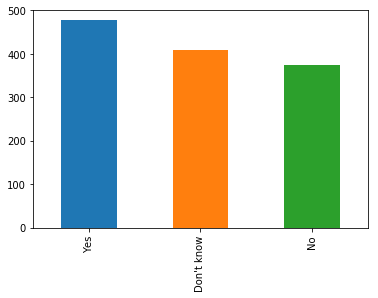

In [92]:
print(df.benefits.value_counts(normalize=False).plot.bar())
# else the boolean would be true

### <font color="red">Q8: Create a histogram of the Age distribution with an appropriate number of bins.  </font>

Hint: use the bins= option to plot()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


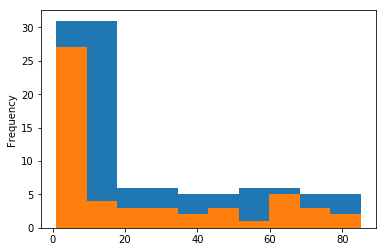

In [90]:
# put your code here
print(df.Age.value_counts().plot.hist(bins=5))
print(df.Age.value_counts().plot.hist())
# else ignore the values of bins

## Discretization and Binning
Discretization of continuous variables can potentially enhance the goodness-of-fit of a statistical model. Age, for example, is a common varaible to be categorized.

### <font color="red">Q9: </font> Discretize the age into bins (16,21], (21,25], (25,30], (30, 35], (35,40], (40,50], (50,60], (60,).  

How many respondents are in each range? 
Hint: create a list of bin values
Hint: use pd.cut()
Hint: use value_counts()

In [1]:
# put your code here
bins = [15,20,25,30,35,40,50,60,200]
df['Age_group'] = pd.cut(df.Age, bins)
print(df['Age_group'].value_counts().plot.hist(bins=5))
print(df['Age_group'].value_counts())

NameError: name 'pd' is not defined

## Aggregation

Example: Find the size of each Age group.

Solution:

In [82]:
df.groupby('Age_group').size()

Age_group
(15, 20]      22
(20, 25]     195
(25, 30]     362
(30, 35]     339
(35, 40]     185
(40, 50]     122
(50, 60]      22
(60, 200]      4
dtype: int64

### <font color="red">Q10: Find the median age of each state. </font>

In [83]:
# put your code here
df.groupby(['state'])['Age'].median()
df.groupby(['state'])['Age'].size().sort_values(ascending=False)

state
CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
PA     29
OR     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
MO     12
WI     12
GA     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NH      3
VT      3
SD      3
KS      3
NV      3
WY      2
NM      2
NE      2
RI      1
ID      1
WV      1
LA      1
ME      1
MS      1
Name: Age, dtype: int64

# Part 2 (on your own): Exploration of Movie Titles and Movie Cast

We're going to be doing some random sampling, so let's load up the ```random``` library:

In [23]:
import random
from random import sample

## time to load some data

load up the tables we need

In [24]:
titles = pd.read_csv('data/titles.csv', index_col=None)

The titles DataFrame contains a list of movie titles and release year

In [25]:
cast = pd.read_csv('data/cast.csv', index_col=None)

The ```cast``` DataFrame contains the following columns 

**title** = name of movie

**year** = year of movie

**name** = name of actor/actress

**type** = actor or actress

**character** = character name

**n** = number in the credits (NaN when not available)

In [26]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [27]:
cast.sample(5)

,title,year,name,type,character,n
2418058,Agent Ranjid rettet die Welt,2012,Kaya Yanar,actor,Mutter,1.0
3070148,Shades,1999,Mireille Leveque,actress,Michelle Miller,4.0
2849899,Mga batang turista,1965,Blanca Gomez,actress,The Girls,2.0
1564594,Monayi Angane Aanayi,2014,Ranjith Munshi,actor,Astrologer,NaN
2381344,She Has What It Takes,1943,Matt (II) Willis,actor,'One Round' Beasley,6.0


### Q11: How many entries are there in the cast table?

In [28]:
# put your code here
len(cast)

3634467

### Q12: How many entries are there in the titles table?

In [29]:
# put your code here
print(len(titles))
print(cast.count())

232330
title        3634467
year         3634467
name         3634467
type         3634467
character    3634467
n            2244068
dtype: int64


## Some basic analyses

### Q13: What are the two earliest movies?

In [30]:
# put your code here
titles.sort_values('year').iloc[0:2]

,title,year
177757,Miss Jerry,1894
215272,The Startled Lover,1898


### Q14: How many movies have the title "Hamlet"?

In [31]:
# put your code here
len(titles[titles['title'] == 'Hamlet'])

18

### Q15: List all of the "Treasure Island" movies from earliest to most recent

In [32]:
# put your code here
filter_island = titles[titles['title'] == 'Treasure Island']
filter_island.sort_values('year')

,title,year
206027,Treasure Island,1918
51287,Treasure Island,1920
191050,Treasure Island,1934
96934,Treasure Island,1950
89534,Treasure Island,1972
111343,Treasure Island,1973
205397,Treasure Island,1985
179354,Treasure Island,1999


### Q16: List the supporting roles (having n=2) played by Cary Grant in the 1940s,
in order by year.

In [33]:
# put your code here
print(cast[(cast['n']==2) & (cast['name']=='Cary Grant') & (cast['year']>=1940) & (cast['year']<=1949)])
print(list(cast[(cast['n']==2) & (cast['name']=='Cary Grant') & 
                (cast['year']>=1940) & (cast['year']<=1949)]['character']))

                   title  year        name   type    character    n
845513  My Favorite Wife  1940  Cary Grant  actor   Nick Arden  2.0
845523    Penny Serenade  1941  Cary Grant  actor  Roger Adams  2.0
['Nick Arden', 'Roger Adams']


### Q17: What are the ten most common movie names of all time?

In [34]:
# put your code here
titles['title'].value_counts()[0:10]

Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Temptation              11
Kismet                  11
The Three Musketeers    11
Othello                 11
Freedom                 11
Name: title, dtype: int64

### Q18: Plot the number of "Hamlet" films made each decade

Make sure your decades are in chronological order on the x-axis

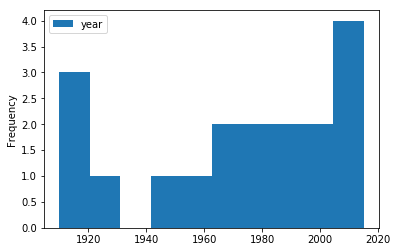

In [53]:
# put your code here
titles[titles['title']=='Hamlet'].plot.hist()

### Q19: Who are the 10 people most often credited as "Herself" in film history?

In [63]:
# put your code here
cast[(cast['name'] == cast['character']) & (cast['type'] == 'actress')].groupby('name').size().sort_values(ascending=False)[0:10]

name
Laverne Andrews        15
Maxene Andrews         15
Patty Andrews          10
Matutina                8
Zsa Zsa Gabor           7
Lena Horne              7
The Andrews Sisters     7
Judy Canova             6
Carolina Cotton         6
Connee Boswell          6
dtype: int64

### Q20: What are the 10 most frequent roles that start with the word "Science"?
Hint: read docs on str.startswith()

In [73]:
# put your code here
Science = cast[cast.character.str.startswith('Science')]
Science.groupby('character').size().sort_values(ascending=False)[0:10]

character
Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Club Member      5
Science Kid              5
Science Promo Cadet      5
Science Reporter         5
Science                  4
Science Fair Kid         3
dtype: int64

### Q21: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [78]:
# put your code here
print('Leading roles for actors:')
print(len(cast[(cast['n']==1) & (cast['type']=='actor') & (cast['year']>=1950) & (cast['year']<=1959)]))
print('Leading roles for actress:')
print(len(cast[(cast['n']==1) & (cast['type']=='actress') & (cast['year']>=1950) & (cast['year']<=1959)]))

Leading roles for actors:
6616
Leading roles for actress:
2965


### Q22: How many supporting (n=2) roles were available to actors,and how many to actresses, in the 1950s?

In [79]:
# put your code here
print('Leading roles for actors:')
print(len(cast[(cast['n']==2) & (cast['type']=='actor') & (cast['year']>=1950) & (cast['year']<=1959)]))
print('Leading roles for actress:')
print(len(cast[(cast['n']==2) & (cast['type']=='actress') & (cast['year']>=1950) & (cast['year']<=1959)]))

Leading roles for actors:
4564
Leading roles for actress:
4556
